<a href="https://colab.research.google.com/github/sahooamarjeet/ML_Case_Study/blob/master/Customer_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

Mount Gdrive in the collab

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
import os;os.listdir("/content/gdrive/My Drive/Colab Notebooks")

['Copy of DL.ipynb',
 'Copy of Copy of DL.ipynb',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'Customer_Analytics.ipynb']

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [8]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
df.shape

(9134, 24)

In [11]:
# column names
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

**2:  Analytics on Engaged Customers**

We are going to analyze it to understand how different customers behave and react to different
marketing strategies.

**2.1: Overall Engagement Rate**

*   The Response field contains information about whether a customer responded to the marketing efforts



In [12]:
# Get the total number of customer responded to the marketing efforts

df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

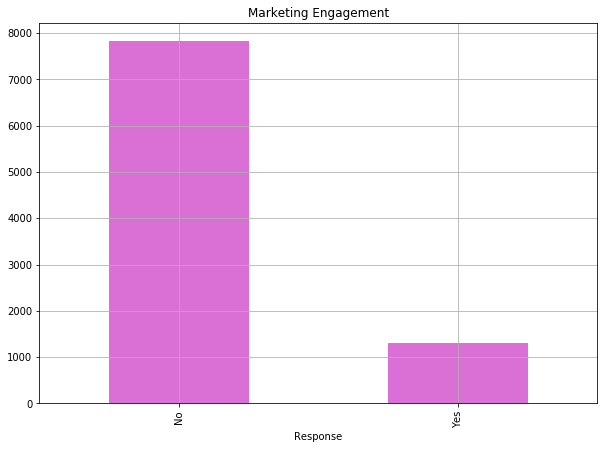

In [14]:
# visualize the customer responded using bar plot 
ax = df.groupby('Response').count()['Customer'].plot(kind = 'bar', color = 'orchid', grid = True, figsize = (10,7),
                                                    title = "Marketing Engagement")

**2.2: Engagement Rates by Offer Type**

The Renew Offer Type column in this DataFrame contains the type of the renewal offer presented to the customers. We are going to look into what types of offers worked best for the engaged customers.

In [0]:
by_offer_type_df = df.loc[df['Response'] == 'Yes',
                         ].groupby(['Renew Offer Type']).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

In [17]:
by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

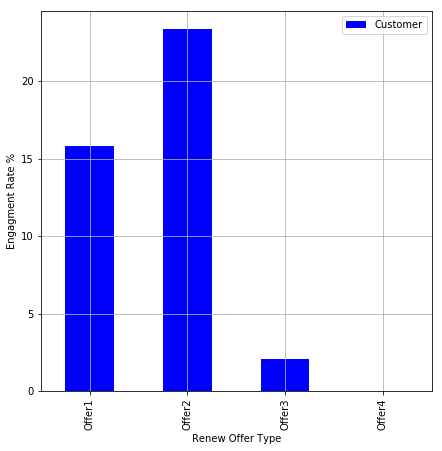

In [20]:
ax = (by_offer_type_df*100).plot(kind = 'bar',figsize = (7,7), color = 'blue', grid = True, legend = True)
ax.set_ylabel("Engagment Rate %")
plt.show()

**2.3: Offer Type & Vehicle Class**

We are going to understand how customers with different attributes respond differently to different marketing messages. We start looking at the engagements rates by each offer type and vehicle class.

In [0]:
by_offer_type_df = df.loc[df['Response'] == 'Yes'  #engaged customer
                         ].groupby([
    'Renew Offer Type', 'Vehicle Class' # group by the two variables
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

In [29]:
# Make the previous output more readable using unstack function
# to pivot the data and extract and transform the inner-level groups to columns

by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


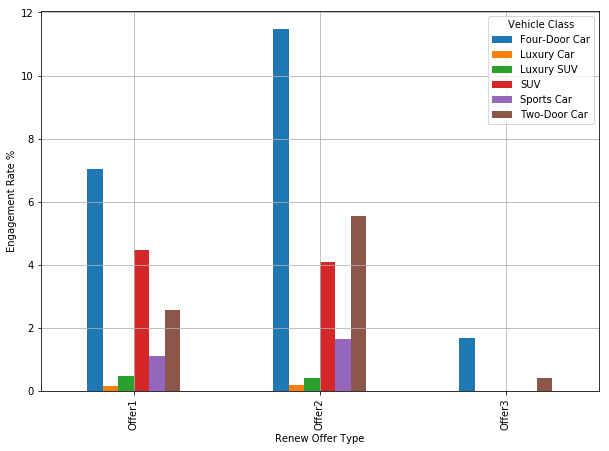

In [30]:
ax = (by_offer_type_df*100).plot(kind = 'bar', figsize = (10,7), grid = True)
ax.set_ylabel('Engagement Rate %')
plt.show()

**2.4: Engagement Rates by Sales Channel**
We are going to analyze how engagement rates differ by different sales channels.

In [31]:
by_sales_channel_df = df.loc[df['Response'] == 'Yes'].groupby([
    'Sales Channel'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

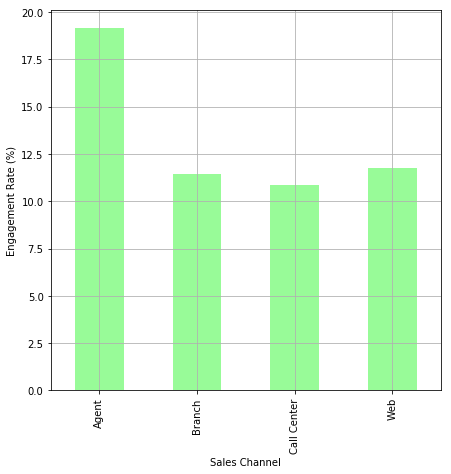

In [32]:
ax = (by_sales_channel_df*100).plot(
kind = 'bar',
figsize = (7,7),
color = 'palegreen',
grid = True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

**2.5: Sales Channel & Vehicle Size**

We are going to see whether customers with various vehicle sizes respond differently to different
sales channels.

In [35]:
by_sales_channel_df = df.loc[df['Response'] == 'Yes'].groupby([
    'Sales Channel','Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [36]:
#unstack 
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df


Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


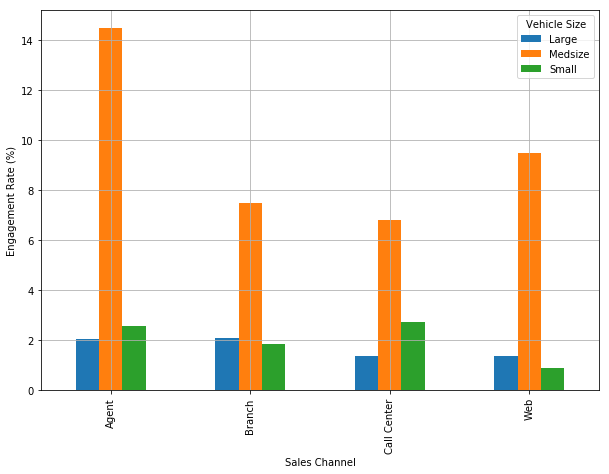

In [38]:
ax = (by_sales_channel_df*100).plot(kind = 'bar', figsize = (10,7), grid = True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()